# Synthetic data generation

In [1]:
import numpy as np
import matplotlib as cm
import matplotlib.pyplot as plt
import os

In [2]:
def linearRegrFunction(n, d, low_d, high_d, w, sigma_noise):
    X = np.zeros((n,d))

    for i in range(0,d):
        X[:,i] = np.random.uniform(low_d[i], high_d[i], size=n)

    gauss_noise = np.random.normal(0, sigma_noise, size=(n, 1))

    Y = np.dot(X, w) + gauss_noise

    return X, Y

Text(0, 0.5, 'Y')

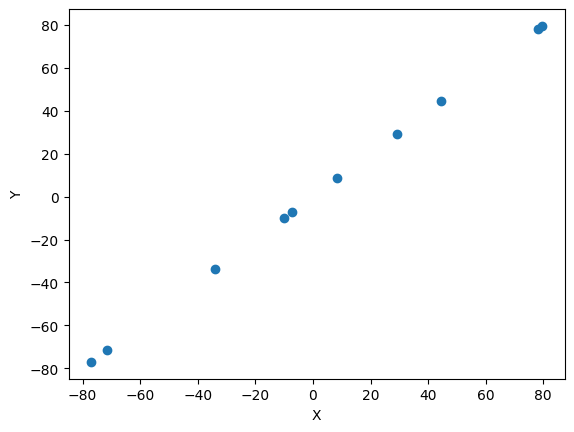

In [3]:
d = 1
w = np.array([1]).reshape(-1,d).T
low_d = np.array([-100])
high_d = np.array([100])

n = 10
X,Y = linearRegrFunction(n, d, low_d, high_d, w, 0)

plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')



Text(0, 0.5, 'Y')

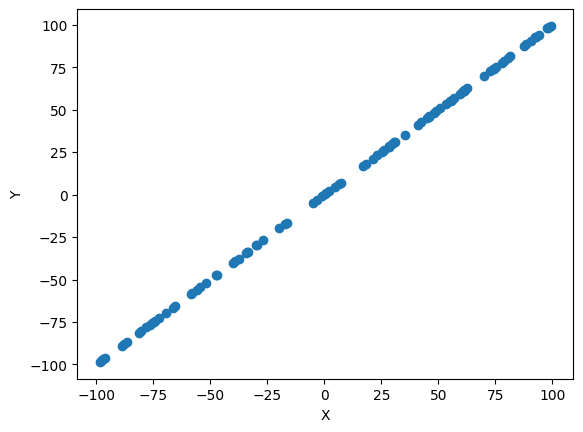

In [4]:
d = 1
w = np.array([1]).reshape(-1,d).T
low_d = np.array([-100])
high_d = np.array([100])

n = 100
X,Y = linearRegrFunction(n, d, low_d, high_d, w, 0)

plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')



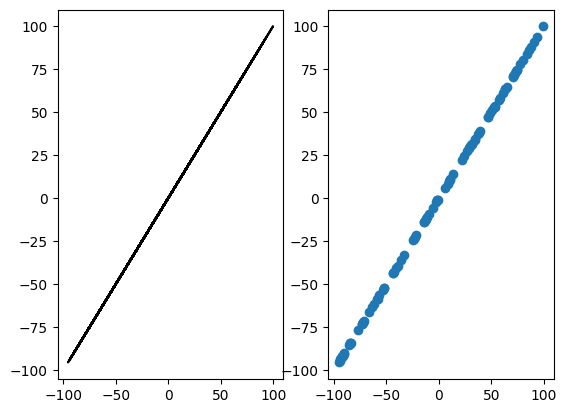

In [5]:
D = 1
w = np.array([1]).reshape(-1, D).transpose()
low_D = np.array([-100])
high_D = np.array([100])

n = 30
sigma_noise = 10
Xtrue, Ytrue = linearRegrFunction(100, D, low_D, high_D, w, 0)
plt.subplot(1,2,1)
plt.plot(Xtrue, Ytrue,'-k')

plt.subplot(1,2,2)
plt.scatter(Xtrue, Ytrue)

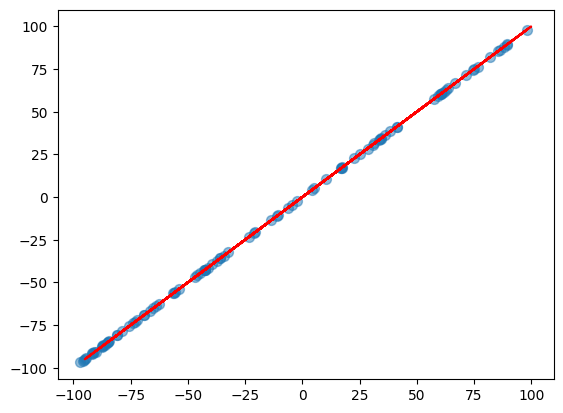

In [6]:
n = 100
D = 1
w = np.array([1]).reshape(-1,D).transpose()

low_D = np.array([-100])
high_D = np.array([100])

Xtrue, Ytrue = linearRegrFunction(100, D, low_D, high_D, w, 0)

Xd1, Yd1 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=0.1)
plt.scatter(Xd1, Yd1, s=50, alpha=0.5)
plt.plot(Xtrue, Ytrue, c='r')


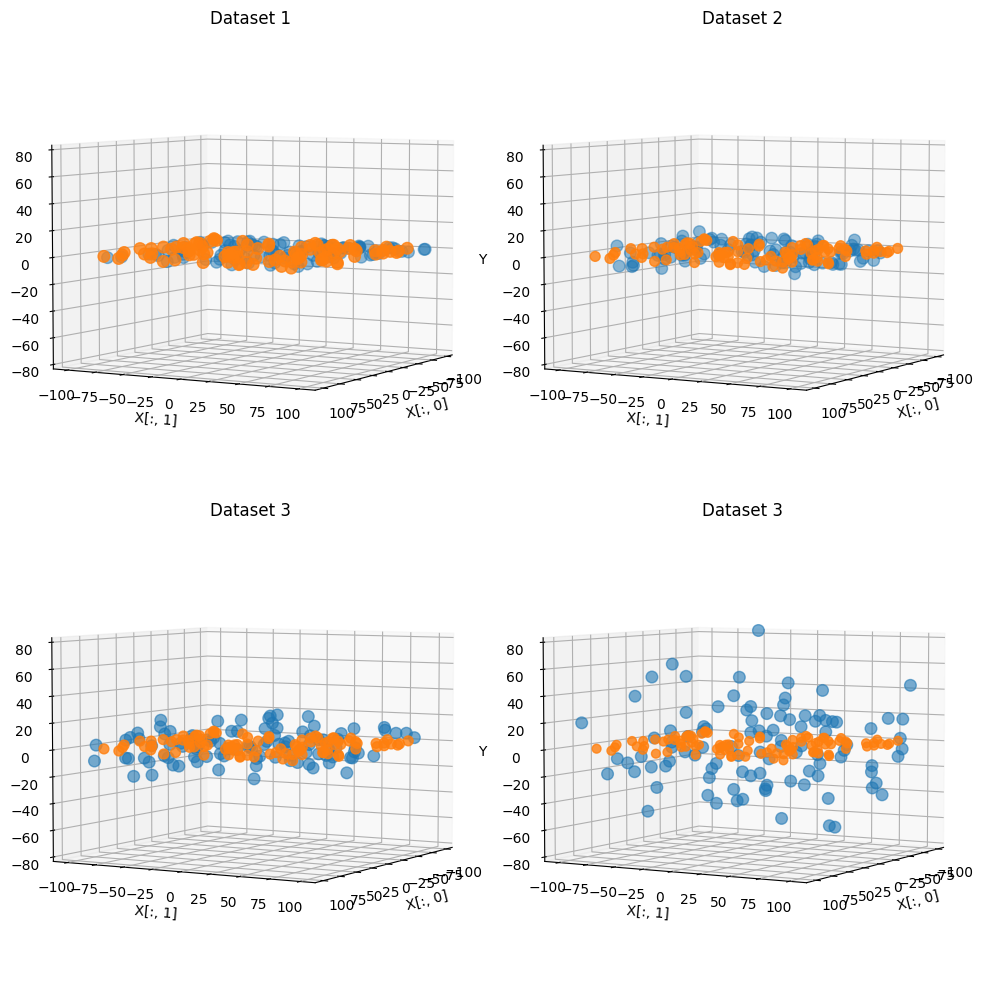

In [26]:
from mpl_toolkits.mplot3d import Axes3D

n = 100
D = 2
w = np.array([0,0]).reshape(-1, D).transpose()

low_D = np.array([-100, -100])
high_D = np.array([100, 100])

Xtrue, Ytrue = linearRegrFunction(n, D, low_D, high_D, w, 0)

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax1 = fig.add_subplot(2, 2, 2, projection='3d')
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax3 = fig.add_subplot(2, 2, 4, projection='3d')

Xd1, Yd1 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=0.1)
ax0.scatter3D(Xd1[:, 0], Xd1[:, 1], Yd1, s=70, alpha=0.5)
ax0.scatter3D(Xtrue[:, 0], Xtrue[:, 1], Ytrue, s=70, alpha=0.8)
ax0.set_title("Dataset 1")
ax0.view_init(azim=30, elev=5)
ax0.set_xlabel('X[:, 0]')
ax0.set_ylabel('X[:, 1]')
ax0.set_zlabel('Y')
ax0.set_zlim([-80, 80])

Xd2, Yd2 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=5)
ax1.scatter3D(Xd2[:, 0], Xd2[:, 1], Yd2, s=70, alpha=0.5)
ax1.scatter3D(Xtrue[:, 0], Xtrue[:, 1], Ytrue, s=50, alpha=0.8)
ax1.set_title("Dataset 2")
ax1.view_init(azim=30, elev=5)
ax1.set_xlabel("X[:, 0]")
ax1.set_ylabel("X[:, 1]")
ax1.set_zlabel('Y')
ax1.set_zlim([-80,80])

Xd3, Yd3 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=10)
ax2.scatter3D(Xd3[:, 0], Xd3[:, 1], Yd3, s=70, alpha=0.6)
ax2.scatter3D(Xtrue[:, 0], Xtrue[:, 1], Ytrue, s=50, alpha=0.8)
ax2.set_title("Dataset 3")
ax2.view_init(azim=30, elev=5)
ax2.set_xlabel("X[:, 0]")
ax2.set_ylabel("X[:, 1]")
ax2.set_zlabel("Y")
ax2.set_zlim([-80,80])

Xd4, Yd4 = linearRegrFunction(n, D, low_D, high_D, w, sigma_noise=25)
ax3.scatter3D(Xd4[:, 0], Xd4[:, 1], Yd4, s=70, alpha=0.6)
ax3.scatter3D(Xtrue[:, 0], Xtrue[:, 1], Ytrue, s=40, alpha=0.8)
ax3.set_title("Dataset 3")
ax3.view_init(azim=30, elev=5)
ax3.set_xlabel("X[:, 0]")
ax3.set_ylabel("X[:, 1]")
ax3.set_zlabel("Y")
ax3.set_zlim([-80, 80])
fig.tight_layout()

In [31]:
def mixGauss(means, sigmas, n):

    means = np.array(means)
    sigmas = np.array(sigmas)

    d = means.shape[1]
    num_classes = sigmas.size
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) *n] = np.random.multivariate_normal(mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2, size=n)
        labels[idx * n: (idx + 1) * n] = idx
    if(num_classes == 2):
        labels[labels==0] = -1

    return data, labels

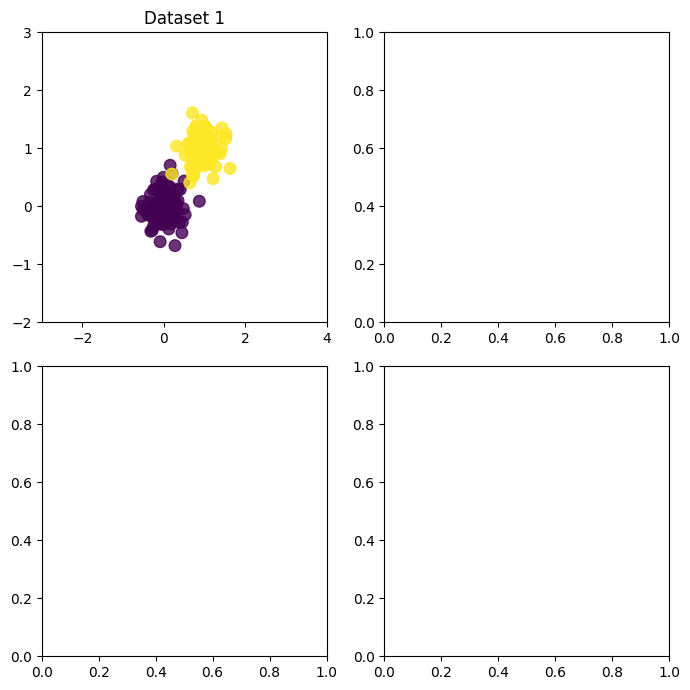

In [32]:
fig = plt.figure(figsize=(7,7)) 
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

X1d, Y1d = mixGauss([[0,0], [1,1]], [0.25, 0.25], 100)
ax0.set_title("Dataset 1")
ax0.scatter(X1d[:, 0], X1d[:, 1], s=70, c=Y1d, alpha=0.8)
ax0.set_xlim((-3, 4))
ax0.set_ylim((-2, 3))

fig.tight_layout()

In [33]:
def flipLabels(Y, perc):

    if perc < 1 or perc > 100:
        print("p should be a percentage value between 0 and 100.")
        return -1

    if any(np.abs(Y) != 1):
        print("The values of Ytr should be +1 or -1.")
        return -1

    Y_noisy = np.copy(np.squeeze(Y))
    if Y_noisy.ndim > 1:
        print("Please supply a label array with only one dimension")
        return -1

    n = Y_noisy.size
    n_flips = int(np.floor(n * perc / 100))
    idx_to_flip = np.random.choice(n, size=n_flips, replace=False)
    Y_noisy[idx_to_flip] = -Y_noisy[idx_to_flip]

    return Y_noisy

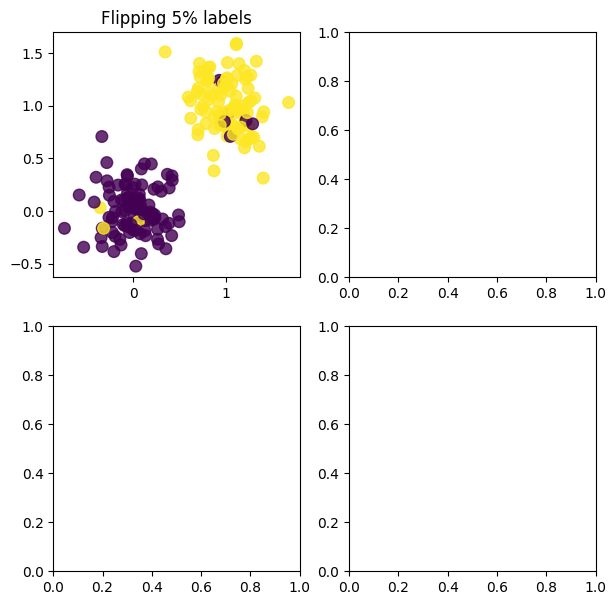

In [34]:
X1, Y1 = mixGauss([[0,0], [1,1]], [0.25, 0.25], 100)

fig = plt.figure(figsize=(7,7)) 
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

Y1_n0 = flipLabels(Y1, 5)
ax0.set_title("Flipping 5% labels")
ax0.scatter(X1[:,0], X1[:,1], s=70, c=Y1_n0, alpha=0.8)